In [8]:
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install pydotplus
!pip install numpy
!pip install pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
import sklearn as skl
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import pydotplus

In [9]:
penguinsData = pd.read_csv("penguins.csv")
species = penguinsData['species']
penguinsData.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [10]:
penguins = penguinsData
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


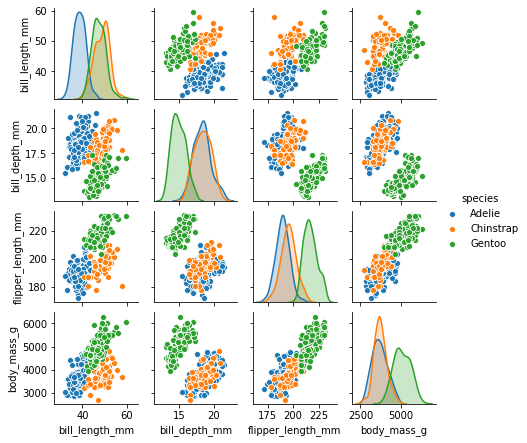

In [11]:
sns.pairplot(penguins, hue='species', height=1.5)
plt.show()

In [12]:
penguinsData.fillna(penguinsData.mean(), inplace=True)
penguinsData.sex = pd.get_dummies(penguinsData.sex)
penguinsData.island = pd.Categorical(penguinsData.island, categories=penguinsData.island.unique()).codes
penguinsData.species = pd.Categorical(penguinsData.species, categories=penguinsData.species.unique()).codes

In [13]:
def two_features_plot(feature1, feature2, data, species):
    penguins = data
    concat_features = pd.concat([feature1, feature2], axis=1)
    X_penguins = concat_features
    y_penguins = penguins['species']
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_penguins, y_penguins, random_state=1)
    model = GaussianNB()
    model.fit(Xtrain, ytrain)
    y_model = model.predict(Xtest)
    ypred = pd.Series(y_model, name='prediction')
    predicted = pd.concat([Xtest.reset_index(), ytest.reset_index(), ypred], axis=1)
    plt.scatter(feature1, feature2, alpha=0.6, c=y_penguins, cmap='jet')
    sns.scatterplot(data=data, x=feature1, y=feature2, hue=species)
    plt.xlabel(feature1.name)
    plt.ylabel(feature2.name)
    plt.show()
    print(metrics.accuracy_score(ytest, y_model))

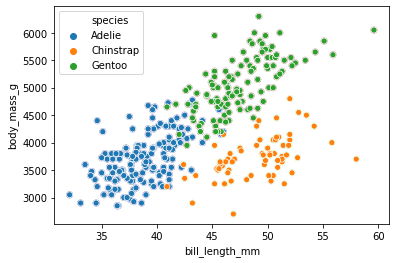

0.9186046511627907


In [14]:
two_features_plot(penguinsData['bill_length_mm'], penguinsData['body_mass_g'], penguinsData, species)

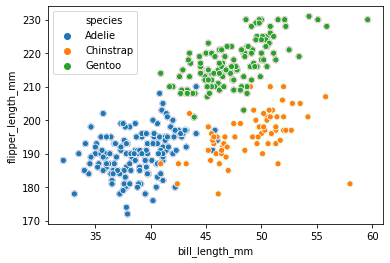

0.9418604651162791


In [15]:
two_features_plot(penguinsData['bill_length_mm'], penguinsData['flipper_length_mm'], penguinsData, species)

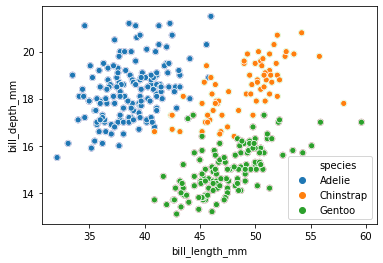

0.9418604651162791


In [16]:
two_features_plot(penguinsData['bill_length_mm'], penguinsData['bill_depth_mm'], penguinsData, species)

In [17]:
X_penguins = penguinsData.drop(['species'], axis=1)
y_penguins = penguinsData['species']
Xtrain, Xtest, ytrain, ytest = train_test_split(X_penguins, y_penguins, test_size=0.2, random_state=1)
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
ypred = pd.Series(y_model, name='prediction')
predicted = pd.concat([Xtest.reset_index(), ytest.reset_index(), ypred], axis=1)
print(metrics.accuracy_score(ytest, y_model))
predicted

0.9565217391304348


,index,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,index,species,prediction
0,306,1,43.4,14.4,218.0,4600.0,1,306,2,2
1,341,1,50.4,15.7,222.0,5750.0,0,341,2,2
2,291,1,46.4,15.6,221.0,5000.0,0,291,2,2
3,102,1,37.7,16.0,183.0,3075.0,1,102,0,0
4,289,1,50.7,15.0,223.0,5550.0,0,289,2,2
...,...,...,...,...,...,...,...,...,...,...
64,89,2,38.9,18.8,190.0,3600.0,1,89,0,0
65,29,1,40.5,18.9,180.0,3950.0,0,29,0,0
66,58,1,36.5,16.6,181.0,2850.0,1,58,0,0
67,212,2,51.9,19.5,206.0,3950.0,0,212,1,1


In [18]:
def bayes_plot(df, model="gnb", spread=30):
    df.dropna()
    colors = 'seismic'
    col1 = df.columns[0]
    col2 = df.columns[1]
    target = df.columns[2]
    sns.scatterplot(data=df, x=col1, y=col2, hue=target)
    plt.show()
    y = df[target]  # Target variable
    X = df.drop(target, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                            random_state=1)  # 80% training and 20% test

    clf = GaussianNB()
    if (model != "gnb"):
        clf = DecisionTreeClassifier(max_depth=model)
    clf = clf.fit(X_train, y_train)

    # Train Classifer

    prob = len(clf.classes_) == 2

    # Predict the response for test dataset

    y_pred = clf.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))

    hueorder = clf.classes_

    def numify(val):
        return np.where(clf.classes_ == val)[0]

    Y = y.apply(numify)
    x_min, x_max = X.loc[:, col1].min() - 1, X.loc[:, col1].max() + 1
    y_min, y_max = X.loc[:, col2].min() - 1, X.loc[:, col2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                             np.arange(y_min, y_max, 0.2))

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    if prob:
        Z = Z[:, 1] - Z[:, 0]
    else:
        colors = "Set1"
        Z = np.argmax(Z, axis=1)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=colors, alpha=0.5)
    plt.colorbar()
    if not prob:
        plt.clim(0, len(clf.classes_) + 3)
    sns.scatterplot(data=df[::spread], x=col1, y=col2, hue=target, hue_order=hueorder, palette=colors)
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    plt.show()  

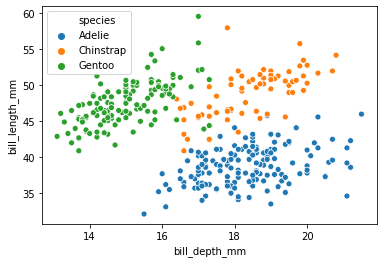

              precision    recall  f1-score   support

      Adelie       1.00      0.94      0.97        34
   Chinstrap       0.82      0.82      0.82        11
      Gentoo       0.92      1.00      0.96        24

    accuracy                           0.94        69
   macro avg       0.91      0.92      0.92        69
weighted avg       0.94      0.94      0.94        69



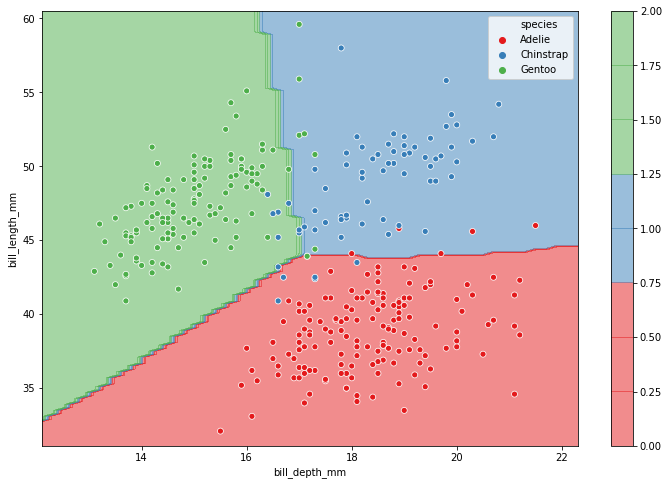

In [19]:
input_values = pd.concat([penguinsData.bill_depth_mm, penguinsData.bill_length_mm], axis=1)
target_values = penguins.species
bayes_plot(pd.concat([input_values, target_values], axis=1), spread=1)

In [28]:
def get_wrong_predictions(feature1, feature2, data, spread=1):
    x = pd.concat([data[feature1], data[feature2]], axis=1)
    y = data['species']
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

    clf = GaussianNB()
    clf = clf.fit(X_train, y_train)

    # Train Classifer

    prob = len(clf.classes_) == 2

    x_min, x_max = x.loc[:, feature1].min() - 1, x.loc[:, feature1].max() + 1
    y_min, y_max = x.loc[:, feature2].min() - 1, x.loc[:, feature2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2))

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

    if prob:
        Z = Z[:, 1] - Z[:, 0]
    else:
        colors = "Set1"
        Z = np.argmax(Z, axis=1)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=colors, alpha=0.5)
    plt.colorbar()
    if not prob:
        plt.clim(0, len(clf.classes_) + 3)

    prediction = clf.predict(x)
    predicted = pd.DataFrame(prediction, columns=['predicted'])
    data_with_prediction = pd.concat([x, y, predicted], axis=1)
    data_with_wrong_predictions = data_with_prediction.where(data_with_prediction['species'] != data_with_prediction['predicted'])
    data_with_wrong_predictions = data_with_wrong_predictions.dropna()

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=colors, alpha=0.5)
    if not prob:
        plt.clim(0, len(clf.classes_) + 3)

    hueorder = clf.classes_
    sns.scatterplot(data=data_with_wrong_predictions[::spread], x=feature1, y=feature2, hue=y, hue_order=hueorder, palette=colors)
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    plt.show()

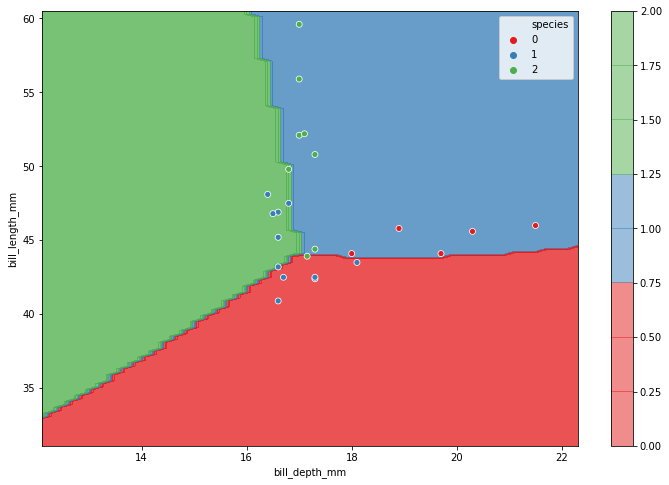

In [29]:
get_wrong_predictions('bill_depth_mm', 'bill_length_mm', penguinsData)